In [ ]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import *

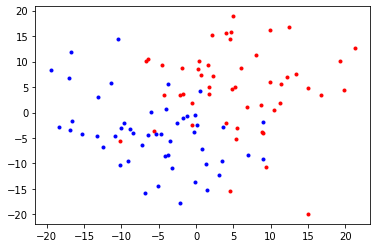

In [13]:
plt.plot(X[2,:], X[30,:], 'r.')
plt.plot(Y[2,:], Y[30,:], 'b.')
plt.show()

In [14]:
C = 0.1
l = 100
k = 2

b = cp.Variable(1)
X2 = X[[2, 30], :]
Y2 = Y[[2, 30], :]
# print(X2.shape)
n_feat = 2
M = np.concatenate((X2, Y2), axis=1)
w = cp.Variable(n_feat)
zeta = cp.Variable(l)

y_label = np.concatenate((np.ones(50), -np.ones(50)))

objective_soft = cp.Minimize(0.5*cp.norm(w,2)**2 + C*(cp.sum(zeta))**k)
constraints_soft = [
    zeta >= 0,
    cp.multiply(y_label, (w.T@M + b)) >= 1 - zeta,
]
problem_soft = cp.Problem(objective_soft, constraints_soft)
problem_soft.solve(solver=cp.ECOS, verbose=False)

113.77981079754106

In [5]:
print(w.value.shape)
print(w.value)
print(w.value[1])
print(b.value)
print(np.round(zeta.value,3))
# i1 = 0
# i2 = 1
# x = np.linspace(-30, 30, 100)
# print(-(w.value[i1]*x + b.value)/w.value[i2])

(2,)
[ 0.08610356 -0.05776565]
-0.057765649195596236
[0.62864925]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.026 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.002 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


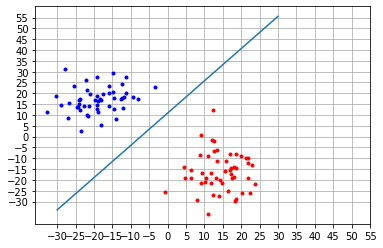

In [6]:
i1 = 0
i2 = 1
plt.plot(X2[i1,:], X2[i2,:], 'r.')
plt.plot(Y2[i1,:], Y2[i2,:], 'b.')
x = np.linspace(-30, 30, 100)
y = -(w.value[i1]*x + b.value)/w.value[i2]


# print(y)
plt.plot(x, y)
plt.grid()
plt.xticks(np.arange(-30, 60, 5))
plt.yticks(np.arange(-30, 60, 5))
plt.show()

In [7]:
print((w.value[i1]*X2[i1,:] + w.value[i2]*X2[i2,:] + b.value))#/np.linalg.norm(w.value))
print((w.value[i1]*Y2[i1,:] + w.value[i2]*Y2[i2,:] + b.value))#/np.linalg.norm(w.value))

[[2.87431669 2.05578774 2.09284545 2.62450738 1.74854043 2.9442896
  3.90243649 3.15933029 2.96761382 3.00663276 2.63606075 3.48488884
  2.06069267 2.65992966 3.10897619 2.60074723 2.70843105 3.23300863
  1.86875823 2.99300896 2.869303   3.08042054 3.92281817 1.83202816
  3.41110129 2.39704146 3.8726818  2.86200091 2.43235498 1.83061092
  3.34854039 2.54875837 2.14058396 3.08216427 3.25317234 2.2859787
  0.97426276 3.63802207 2.1063605  2.90472551 3.19606082 4.06221861
  3.91715036 3.01295401 3.02298184 1.36597911 2.13665988 3.24434402
  2.68946684 3.61480729]]
[[-1.75979779 -2.2752201  -2.42551977 -2.60448407 -2.85985243 -1.2522225
  -2.91587389 -2.71173242 -3.05189585 -1.67107818 -1.55783576 -2.42279496
  -1.83184138 -1.47859859 -1.43870755 -3.57887106 -2.3215416  -1.36786301
  -1.1900973  -1.88590114 -2.35260386 -1.9357101  -1.47009722 -2.32895291
  -2.1249202  -2.26650076 -2.02846255 -1.83118702 -2.10072387 -1.91304001
  -1.64862605 -1.83565579 -2.00459318 -1.94900742 -2.16056066 -

In [8]:
print(1/np.linalg.norm(w.value))

9.64454558083233
